102.36834138385076

101.08567205800877

{'T_s': 102.36834138385076,
 'q_s': 92629.96176263502,
 'h_w': 3.918178570893612e-07,
 'h_a': 20.57533475690008}

{'T_s_err': 4349.503850541587,
 'q_s_err': 102291600.69698039,
 'h_w_err': 932103.2154076232,
 'h_a_err': 629.477978388706}

{'T_s': 101.08567205800877,
 'q_s': 295615.22469646274,
 'h_w': 5.121576412796301e-10,
 'h_a': 37.27072279004488}

{'T_s_err': 148.04959810222076,
 'q_s_err': 1899793.1469630175,
 'h_w_err': 1054.5930338124501,
 'h_a_err': 641.9062123779405}

<Axes: >

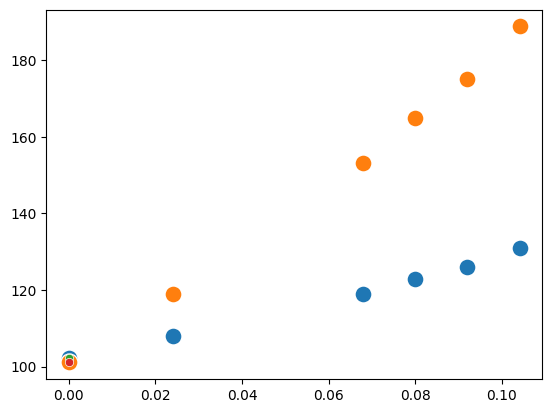

In [1]:
from boilercore.fits import Fit, fit_from_params
from boilercore.models.geometry import GEOMETRY
from pandas import read_csv
from seaborn import lineplot, scatterplot

from boilerdata.models.params import PARAMS

DATA = read_csv("notebooks/compare_fits.csv").reset_index().loc[4000:, :]
X = GEOMETRY.rods["R"]
T_COLS = slice("T1cal (C)", "T5cal (C)")
TS_COL = "T_s (C)"
BEGIN = 4000
END = 6000
Y1 = DATA.loc[BEGIN, T_COLS].squeeze().values  # type: ignore
Y2 = DATA.loc[END, T_COLS].squeeze().values  # type: ignore
TS1 = DATA.loc[BEGIN, TS_COL]  # type: ignore
TS2 = DATA.loc[END, TS_COL]  # type: ignore
FIT = Fit()
model = FIT.get_models(PARAMS.paths.model_functions)[0]
fits, errors = fit_from_params(model, FIT, X, Y1)
fits2, errors2 = fit_from_params(model, FIT, X, Y2)
display(fits["T_s"], fits2["T_s"], fits, errors, fits2, errors2)
scatterplot(x=[0, *X], y=[TS1, *Y1], s=150)  # type: ignore
scatterplot(x=[0, *X], y=[TS2, *Y2], s=150)  # type: ignore
scatterplot(x=[0], y=[fits["T_s"]])
scatterplot(x=[0], y=[fits2["T_s"]])

In [2]:
DATA2 = DATA.assign(**{
    "T_s_fitted": lambda df: [
        fit_from_params(model, FIT, X, df.loc[i, T_COLS])[0]["T_s"] for i in df["index"]
    ]
})

<Axes: xlabel='index', ylabel='T5cal (C)'>

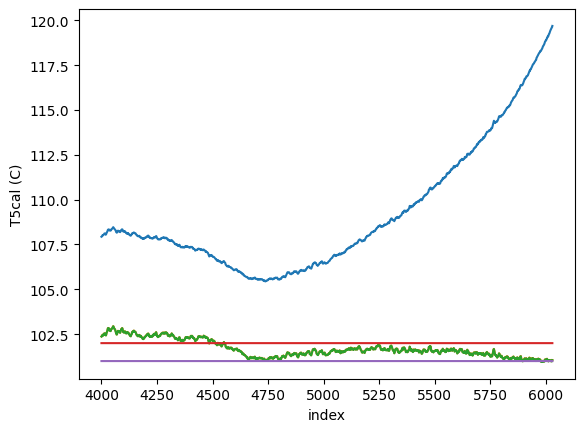

In [3]:
DATA3 = DATA2.assign(**{"sp": 102, "sp2": 101})
lineplot(data=DATA2, x="index", y="T5cal (C)")
lineplot(data=DATA2, x="index", y="T_s (C)")
lineplot(data=DATA2, x="index", y="T_s_fitted")
lineplot(data=DATA3, x="index", y="sp")
lineplot(data=DATA3, x="index", y="sp2")